# Create a general linear model metamodel

In this basic example we are going to create a global approximation of a model response using a general linear model.

In [9]:
from __future__ import print_function
import openturns as ot

In [10]:
# prepare some X/Y data
ot.RandomGenerator.SetSeed(0)
dimension = 2
input_names = ['x1', 'x2']
formulas = ['cos(x1 + x2)']
model = ot.SymbolicFunction(input_names, formulas)
distribution = ot.Normal(dimension)
x  = distribution.getSample(100)
y = model(x)

In [11]:
# create a functional chaos model
basis = ot.ConstantBasisFactory(dimension).build()
covarianceModel = ot.SquaredExponential([1]*dimension, [1.0])
algo = ot.GeneralLinearModelAlgorithm(x, y, covarianceModel, basis)
algo.run()
result = algo.getResult()
responseSurface = result.getMetaModel()

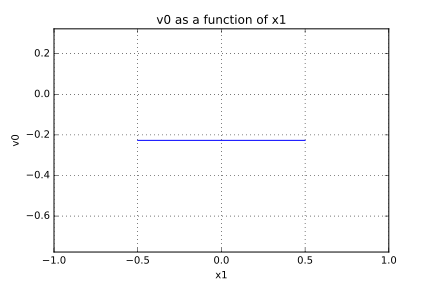

In [12]:
# plot 2nd output of our model with x1=0.5
ot.ParametricFunction(responseSurface, [0], [0.5]).draw(-0.5, 0.5)